In [10]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib

In [11]:
df = pd.read_csv('../../data/yinance/GOOG.csv')
df.head()
df.describe()

,Close,High,Low,Open,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,50.779971,51.285163,50.252347,50.753534,6.123096e+07
std,39.417443,39.853299,38.975050,39.389736,5.537396e+07
min,6.994490,7.408840,6.994490,7.133018,1.584340e+05
25%,16.851089,16.984424,16.699388,16.827651,2.574863e+07
50%,37.327805,37.647668,37.038786,37.388390,3.797798e+07
75%,69.191502,70.084894,68.368832,69.062883,8.269781e+07
max,149.684662,151.066223,148.868758,150.831319,5.952147e+08


In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

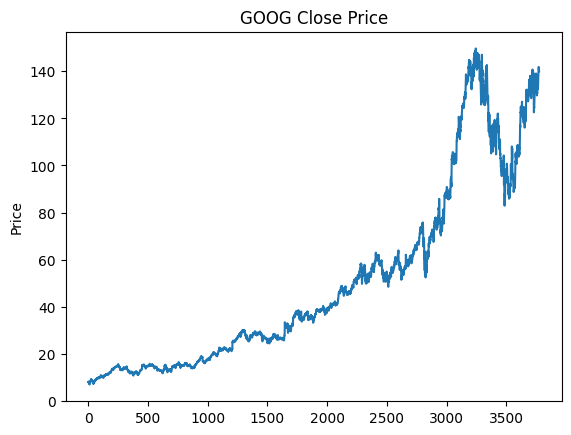

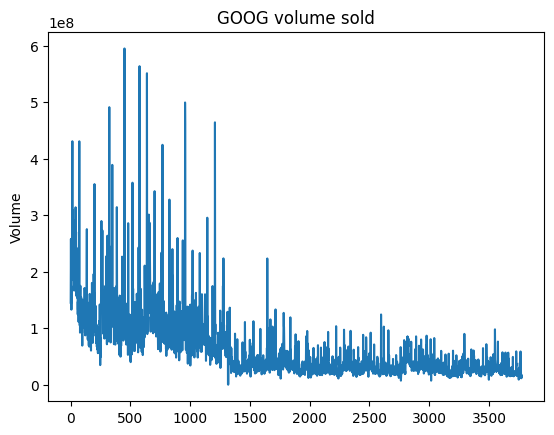

In [13]:
df['Close'].plot(title="GOOG Close Price")
plt.ylabel("Price")
plt.show()

df['Volume'].plot(title="GOOG volume sold")
plt.ylabel("Volume")
plt.show()

In [14]:
price= df["Close"]
df["SMA_20"] = talib.SMA(price, timeperiod=20)
df["SMA_50"] = talib.SMA(price, timeperiod=50)
df["EMA_20"] = talib.EMA(price, timeperiod=20)

df["RSI_14"] = talib.RSI(price, timeperiod=14)

df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
    price, 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

df.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,141.750000,142.276397,141.089511,141.164014,18513500,135.009596,133.914786,135.854576,64.953309,1.412015,0.572046,0.839969
3770,2023-12-26,141.849304,142.966658,141.531472,142.008205,11170100,135.246477,133.999010,136.425503,65.115870,1.706565,0.798950,0.907615
3771,2023-12-27,140.478683,142.345911,140.092320,141.859236,17288400,135.386520,134.017881,136.811520,60.916026,1.808553,1.000870,0.807682
3772,2023-12-28,140.319748,141.303025,139.870824,140.885881,12192500,135.628861,134.023641,137.145637,60.429303,1.855168,1.171730,0.683438
3773,2023-12-29,139.972137,140.473710,138.949139,139.723837,14881000,135.976979,134.056417,137.414827,59.313063,1.842820,1.305948,0.536872


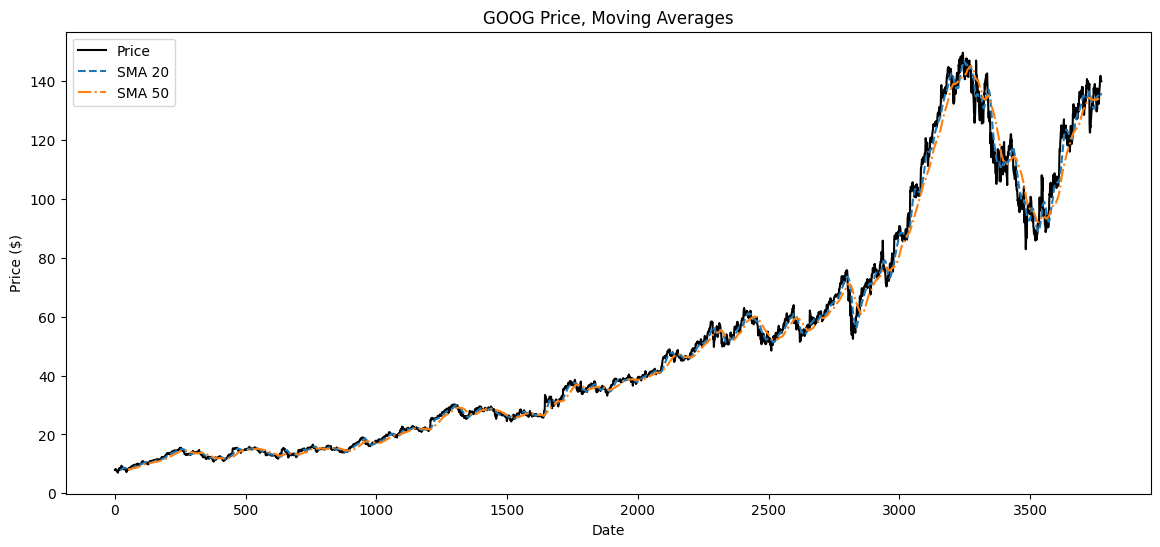

In [15]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, price, label="Price", color="black")
ax.plot(df.index, df["SMA_20"], label="SMA 20", linestyle="--")
ax.plot(df.index, df["SMA_50"], label="SMA 50", linestyle="-.")
ax.set_title("GOOG Price, Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()

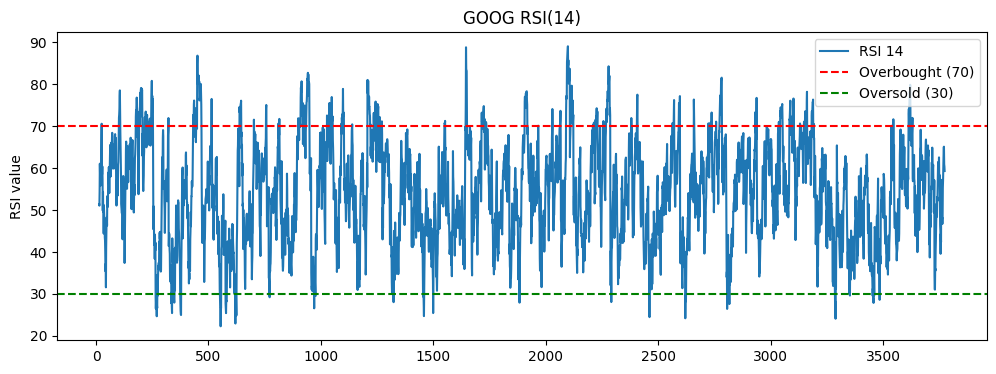

In [16]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df["RSI_14"], label="RSI 14")
ax.axhline(70, color="red", linestyle="--", label="Overbought (70)")
ax.axhline(30, color="green", linestyle="--", label="Oversold (30)")
ax.set_title("GOOG RSI(14)")
ax.set_ylabel("RSI value")
ax.legend()
plt.show()

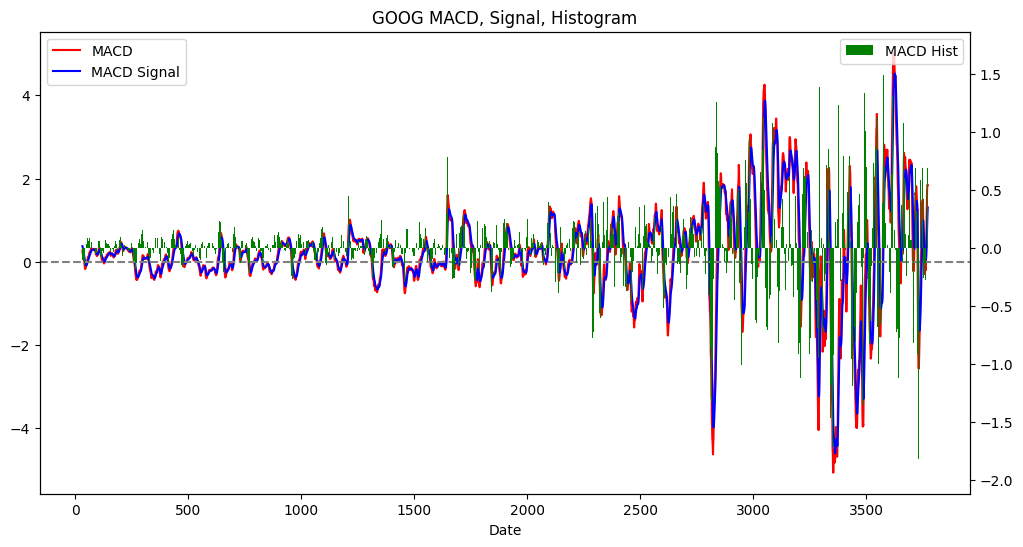

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df["MACD"], label="MACD", color="red")
ax.plot(df.index, df["MACD_signal"], label="MACD Signal", color="blue")
ax.axhline(0, color="grey", linestyle="--")
ax2 = ax.twinx()
ax2.bar(df.index, df["MACD_hist"], label="MACD Hist", color="green")

ax.set_title("GOOG MACD, Signal, Histogram")
ax.set_xlabel("Date")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()